In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from collections import Counter
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import r2_score,roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

## 1. Data Analysis

### 1.1 Loading the Dataset

In [87]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=531,as_frame=True)

x = boston.data
y = boston.target

df = pd.DataFrame(pd.concat([x,y],axis=1))

# Renaming the column "MEDV" to "Target"
df = df.rename(columns={"MEDV":"Target"})

### 1.2 Dropping Categorical Features

In [88]:
x = x.drop(columns=['CHAS','RAD'])
df = df.drop(columns=['CHAS','RAD'])
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


### 1.3 Correlation HeatMap

Correlation Matrix:              CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
ZN      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
INDUS    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
NOX      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
RM      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
AGE      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
DIS     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
TAX      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
PTRATIO  0.289946 -0.391679  0.383248  0.188933 -0.355501  0.261515 -0.232471   
B       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
LSTAT    0.455621 -0.412995  0.603800  0.590879 -0.613808  0.602339 -0.496996   
Target  

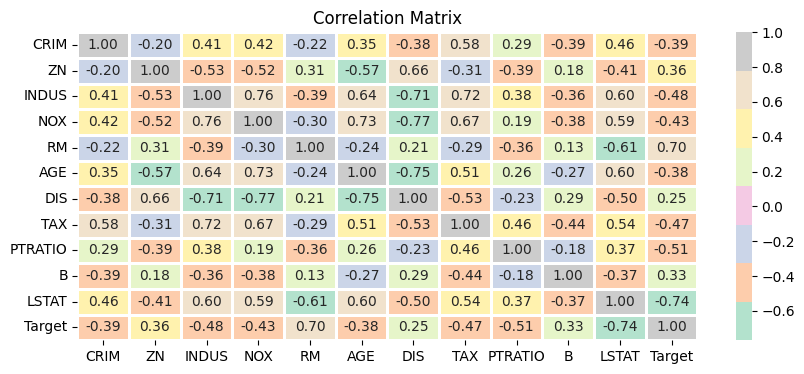

In [90]:
corr_mat = df.corr()
print("Correlation Matrix:",corr_mat)
# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_mat, annot=True, cmap='Pastel2', fmt='.2f', linewidths=1)
# Add titles and labels
plt.title('Correlation Matrix')
plt.show()

### 1.4 Pairplot of Selected Features

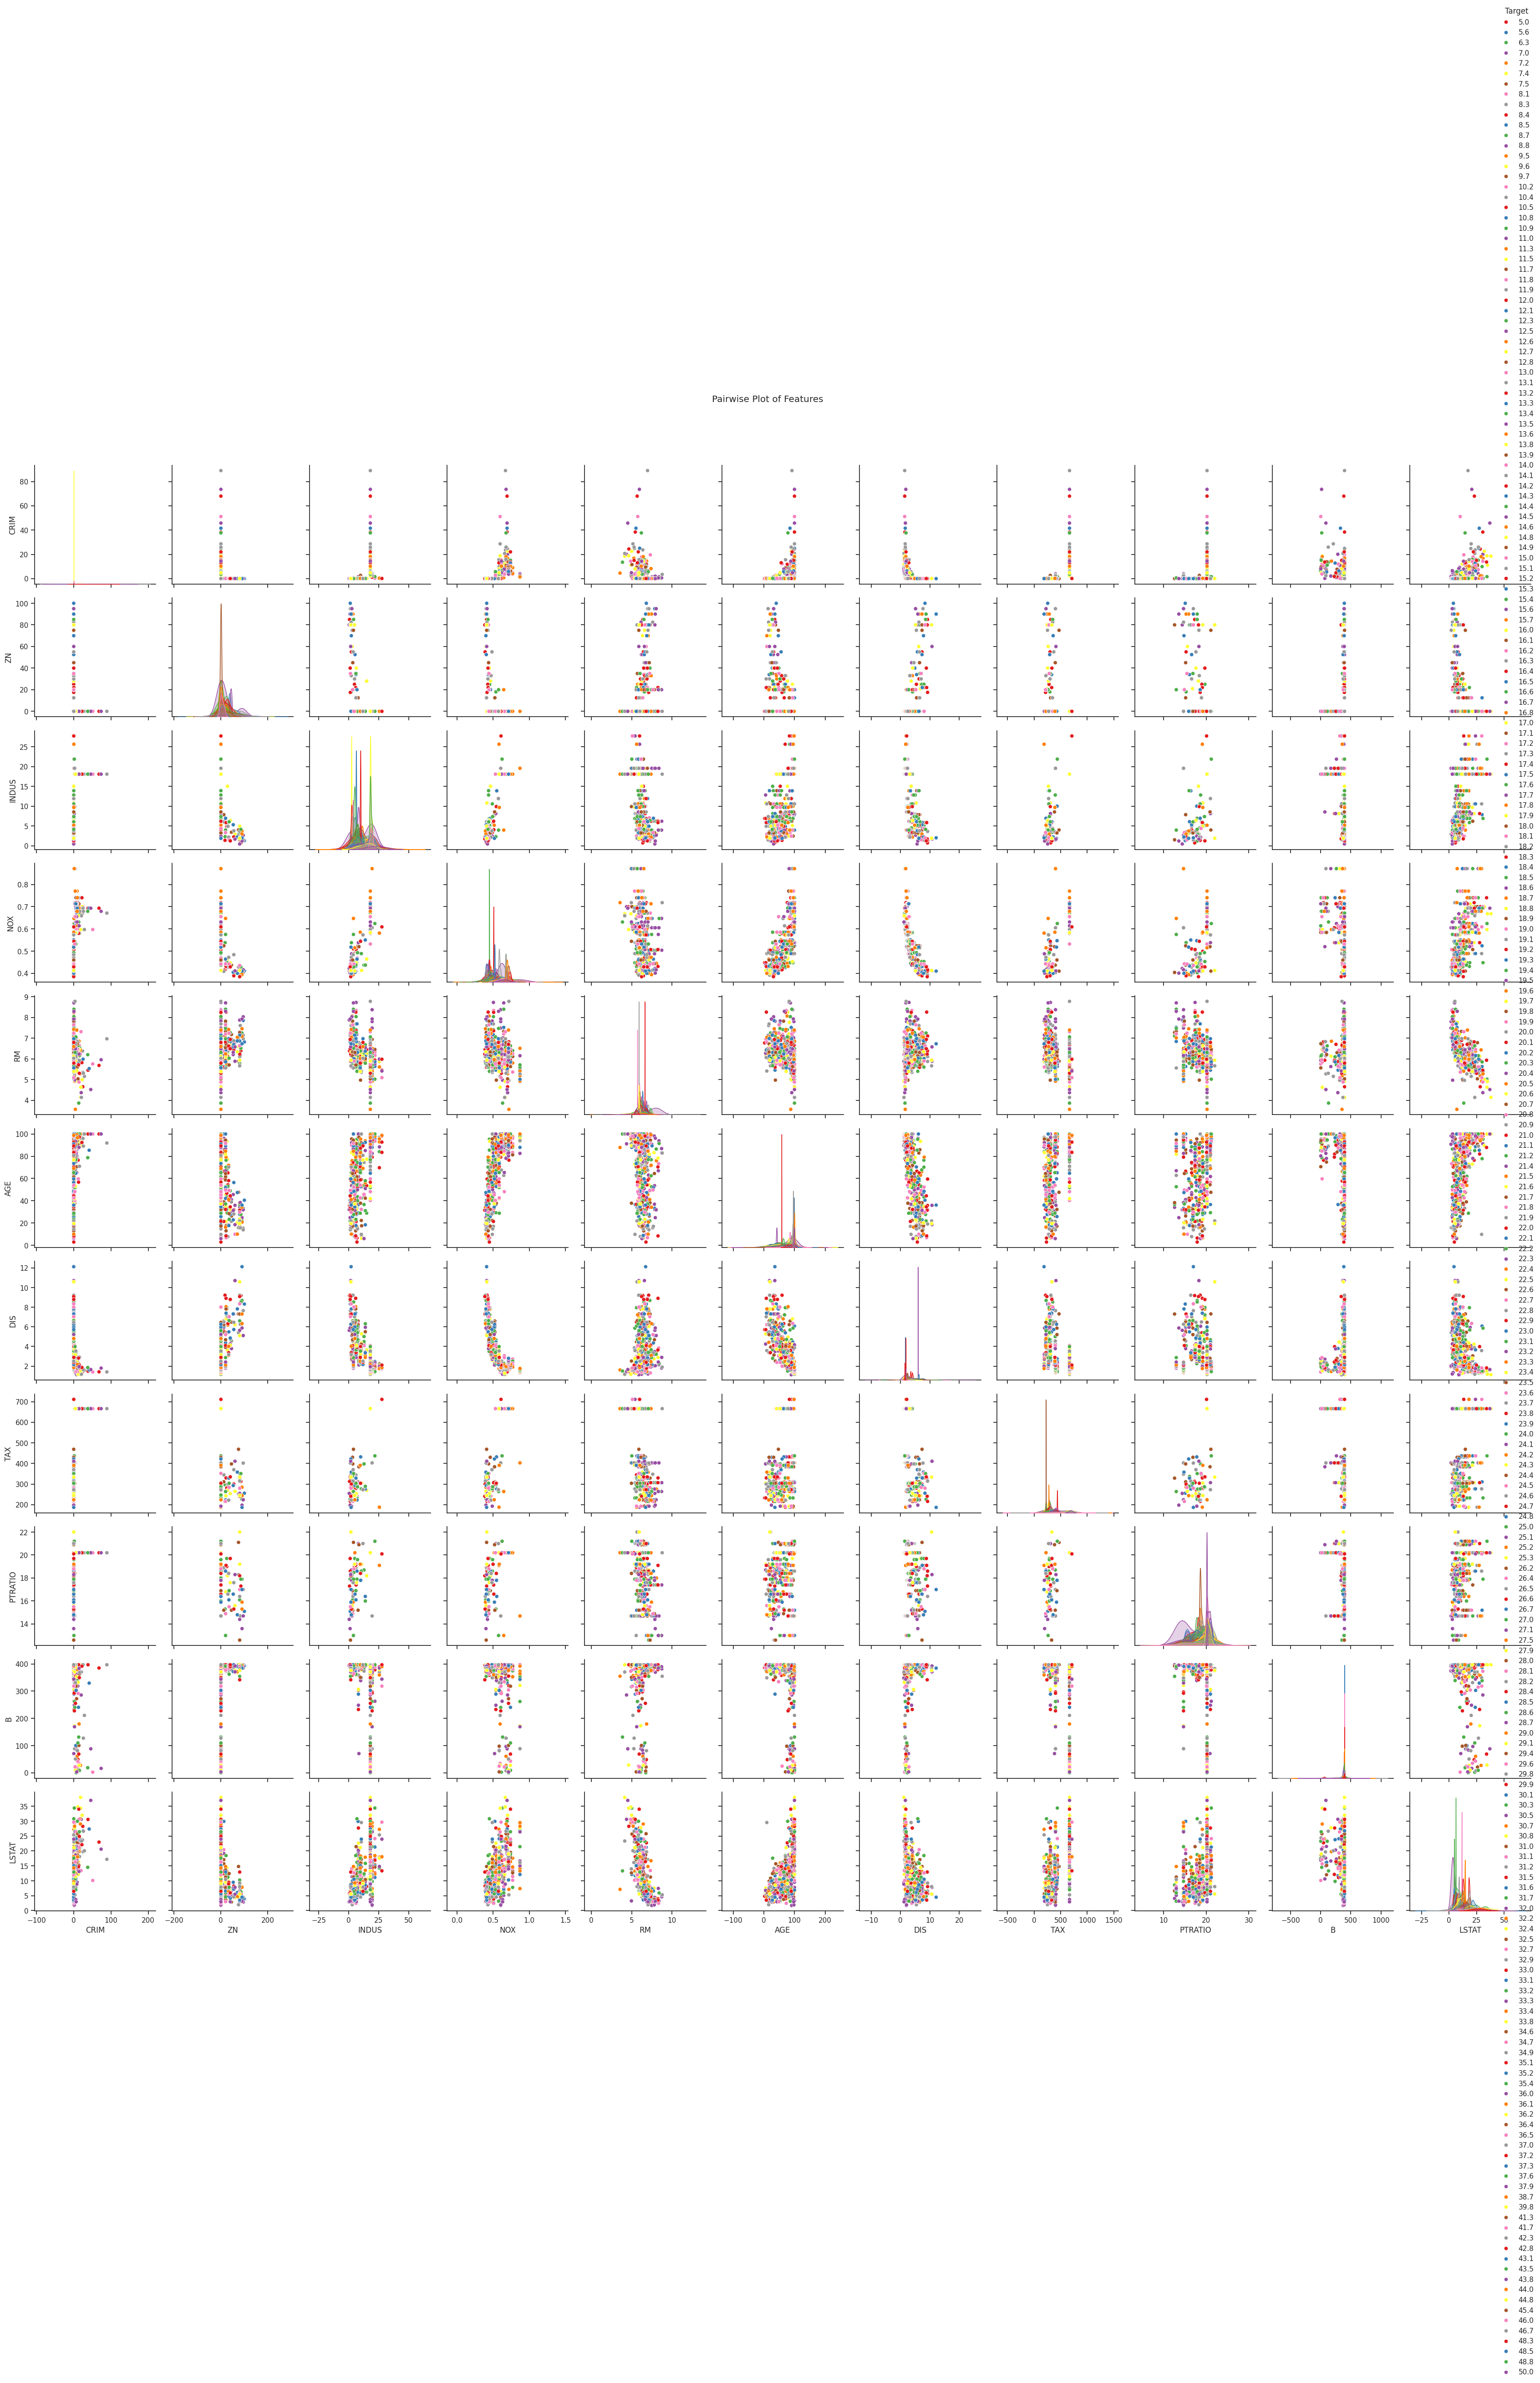

In [182]:
# Seaborn style
sns.set(style="ticks")

# Pairplot
pairplot = sns.pairplot(
    df,
    hue="Target",
    diag_kind="kde",
    palette="Set1",
    corner=False,
    height=3
)

pairplot.fig.suptitle("Pairwise Plot of Features", y=1.03)
plt.tight_layout()
plt.show()

### 1.5 Feature vs. Target (Scatter Plots)

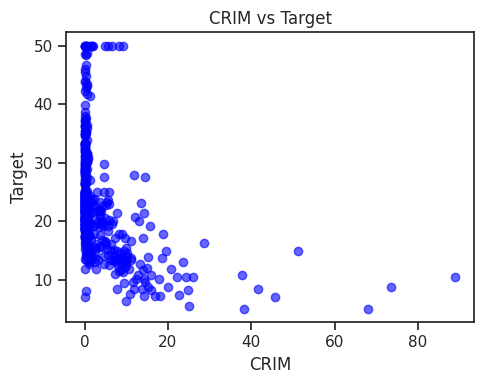

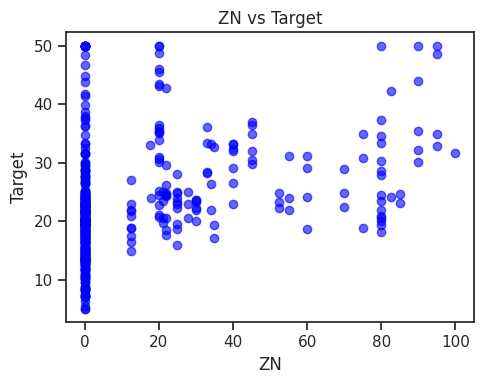

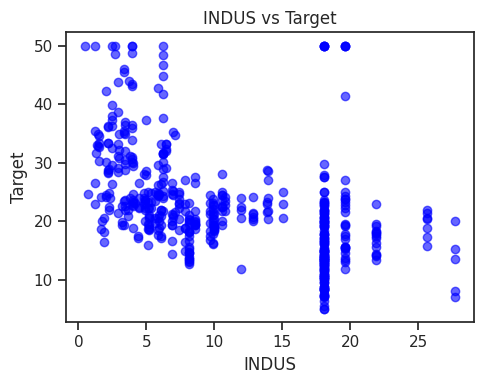

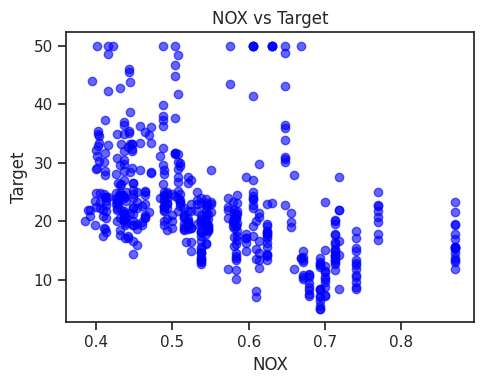

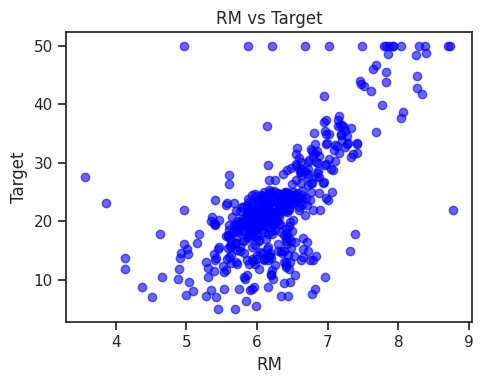

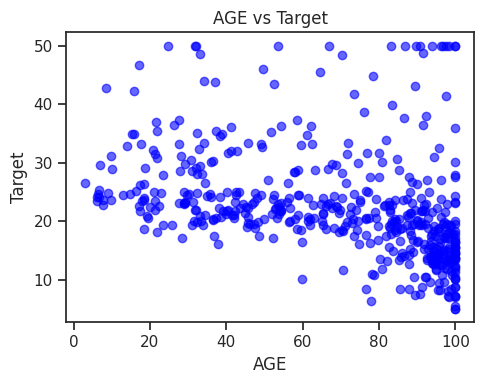

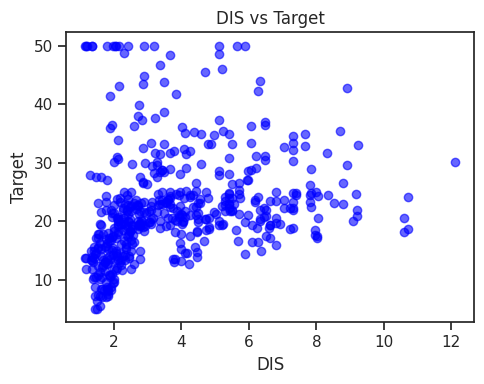

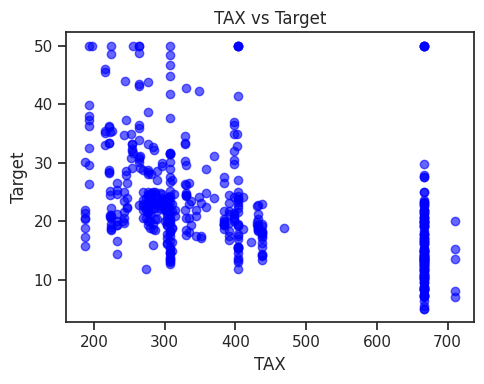

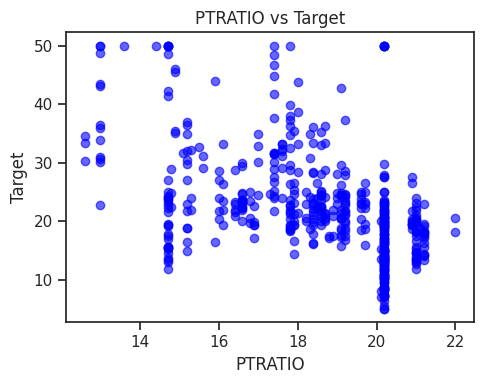

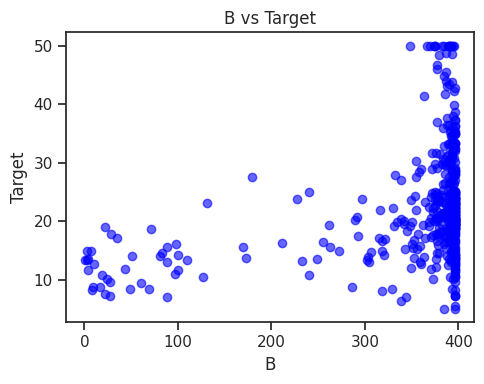

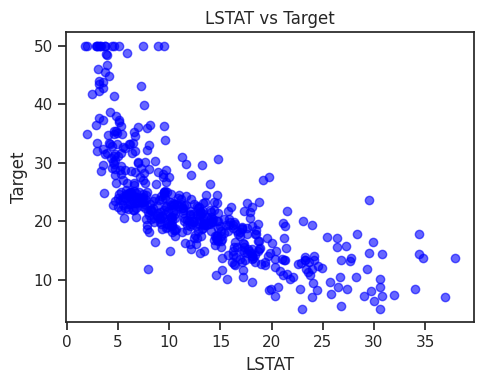

In [183]:
for col in x.columns:
  plt.figure(figsize=(5,4))
  plt.scatter(df[col],df["Target"],alpha=0.6,color="blue")
  plt.title(f'{col} vs Target')
  plt.xlabel(col)
  plt.ylabel("Target")
  plt.tight_layout()
  plt.show()

### 1.6 Distribution of Target (MEDV)

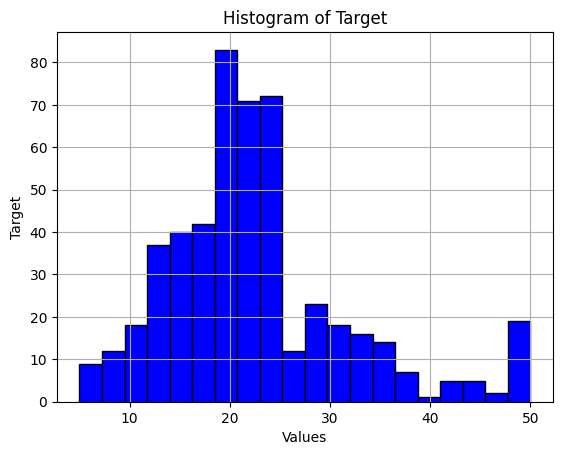

In [92]:
df["Target"].hist(bins=20,color="blue",edgecolor="black")
plt.title("Histogram of Target")
plt.xlabel("Values")
plt.ylabel("Target")
plt.show()

## 2. Scaling and Splitting the data

### 2.1 Scaling the Features using Min-Max Scaling

In [150]:
def min_max_scaling(col):
  return (col - col.min()) / (col.max() - col.min())
x = x.apply(min_max_scaling)

### 2.2 Splitting the dataset into training and testing sets, with 80% training and 20% testing

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 3. Implement KNN Regressor from Scratch

### 3.1 Implementing a KNN regressor from scratch- Simple Average

In [ ]:
class KNN:
  def __init__(self,k,distance_metric):
    self.distance_metric=distance_metric
    self.k=k

  def fit(self,x,y):
    self.x_train=np.array(x)
    self.y_train=np.array(y)

  def euclidean_distance(self,x,y):
    return np.sqrt(np.sum((x - y) ** 2))

  def manhattan_distance(self,x,y):
    dist = np.sum(np.abs(x-y))
    return dist

  def cosine_distance(self,x,y):
    dist = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return 1-dist

  def compute_distance(self,x):
    distances=[]
    for x1 in self.x_train:
      if self.distance_metric == 'euclidean':
         distances.append(self.euclidean_distance(x1,x))
      elif self.distance_metric == 'manhattan':
        distances.append(self.manhattan_distance(x1,x))
      elif self.distance_metric == 'cosine':
        distances.append(self.cosine_distance(x1,x))
    return np.array(distances)

  def predict(self,x_test):
    results=[]
    x_test = np.array(x_test, dtype=float)
    for x in x_test:
      distances = self.compute_distance(x)
      k_nearest = np.argsort(distances)[:self.k]
      results.append(np.mean(self.y_train[k_nearest]))
    return results

### 3.2 Creating a table summarizing the R² scores for each (k, distance metric) pair

In [153]:
res_custom_simple=[]
k_values=[3,5,7,9,11]
for i in k_values:
  temp=[]
  for j in ["euclidean","manhattan","cosine"]:
    knn = KNN(k=i, distance_metric=j)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    temp.append(r2)
  res_custom_simple.append(temp)
print(f"{'k':<10} {'euclidean':<20} {'manhattan':<20} {'cosine':<20}")
print()
for i in range(len(res_custom_simple)):
    print(f"{k_values[i]:<5} {res_custom_simple[i][0]:<20} {res_custom_simple[i][1]:<20} {res_custom_simple[i][2]:<20}")

k          euclidean            manhattan            cosine              

3     0.806225936085709    0.8474853383776559   0.8241910665292309  
5     0.8202458619709629   0.8178002085234142   0.8187305236724719  
7     0.8117381132189742   0.8245860918141971   0.8056612924782857  
9     0.7676051424187184   0.8026054558840323   0.7607049569766116  
11    0.7350348157338118   0.7824071330980673   0.7335402056415807  


The best R2 score is given by the combination (k=3,distance metric=manhattan)

## 4. Compare with scikit-learn Simple KNN

### 4.1 Initialising and Making Predictions using scikit-learn's KNeighborsRegressor

In [166]:
# Storing the Results using scikit-learn's KNeighborsRegressor
res_library_simple=[]
k_values=[3,5,7,9,11]
for i in k_values:
  temp=[]
  for j in ["euclidean","manhattan","cosine"]:
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric=j,algorithm='brute')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    temp.append(r2)
  res_library_simple.append(temp)
print(f"{'k':<10} {'euclidean':<20} {'manhattan':<20} {'cosine':<20}")
print()
for i in range(len(res_library_simple)):
    print(f"{k_values[i]:<5} {res_library_simple[i][0]:<20} {res_library_simple[i][1]:<20} {res_library_simple[i][2]:<20}")

k          euclidean            manhattan            cosine              

3     0.806225936085709    0.8474853383776559   0.8241910665292309  
5     0.8202458619709629   0.8178002085234142   0.8187305236724719  
7     0.8117381132189742   0.8245860918141971   0.8056612924782857  
9     0.7676051424187184   0.8026054558840323   0.7607049569766116  
11    0.7350348157338118   0.7824071330980673   0.7335402056415807  


### 4.2 Comparing the R² score of the scikit-learn model with the custom implementation for that best configuration

In [167]:
#The best configuration
r2_custom = res_custom_simple[0][1]

r2_library = res_library_simple[0][1]

if(r2_library>r2_custom):
  print("The R2 score of the scikit-learn model is greater than the custom implementation")
elif(r2_custom>r2_library):
  print("The R2 score of the custom implementation is greater than the scikit-learn model")
else:
  print("The R2 scores of both models are equal")

The R2 scores of both models are equal


## 5. Implement Weighted KNN Regressor from Scratch

### 5.1 Implementing a weighted average KNN regressor from scratch, where weights are the inverse of the distance to neighbors.

In [ ]:
class Weighted_KNN:
  def __init__(self,k,distance_metric):
    self.distance_metric=distance_metric
    self.k=k

  def fit(self,x,y):
    self.x_train=np.array(x)
    self.y_train=np.array(y)

  def euclidean_distance(self,x,y):
    return np.sqrt(np.sum((x - y) ** 2))

  def manhattan_distance(self,x,y):
    dist = np.sum(np.abs(x-y))
    return dist

  def cosine_distance(self,x,y):
    dist = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return 1-dist

  def compute_distance(self,x):
    distances=[]
    for x1 in self.x_train:
      if self.distance_metric == 'euclidean':
         distances.append(self.euclidean_distance(x1,x))
      elif self.distance_metric == 'manhattan':
        distances.append(self.manhattan_distance(x1,x))
      elif self.distance_metric == 'cosine':
        distances.append(self.cosine_distance(x1,x))
    return np.array(distances)

  def predict(self,x_test):
    results=[]
    x_test = np.array(x_test, dtype=float)
    for x in x_test:
      if(self.distance_metric!='cosine') :
        distances = self.compute_distance(x)
        k_nearest_id = np.argsort(distances)[:self.k]
      else:
        distances = self.compute_distance(x)
        k_nearest_id = np.argsort(distances)[:self.k]
      k_nearest=distances[k_nearest_id]
      for i in range(0,len(k_nearest)):
        if(k_nearest[i]==0):
          k_nearest[i]=1e9
        else :
          k_nearest[i]=1/k_nearest[i]
      total = np.sum(k_nearest)
      results.append(np.dot(k_nearest,self.y_train[k_nearest_id])/total)
    return results

### 5.2 Creating a table summarizing the R² scores for each (k, distance metric) pair.

In [161]:
# Storing the Results using scikit-learn's KNeighborsRegressor
res_custom_weighted=[]
k_values=[3,5,7,9,11]
for i in k_values:
  temp=[]
  for j in ["euclidean","manhattan","cosine"]:
    knn = Weighted_KNN(k=i, distance_metric=j)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    temp.append(r2)
  res_custom_weighted.append(temp)

print(f"{'k':<10} {'euclidean':<20} {'manhattan':<20} {'cosine':<20}")
print()
for i in range(len(res_custom_weighted)):
    print(f"{k_values[i]:<5} {res_custom_weighted[i][0]:<20} {res_custom_weighted[i][1]:<20} {res_custom_weighted[i][2]:<20}")

k          euclidean            manhattan            cosine              

3     0.8244426354744686   0.856656761883737    0.8483844706740258  
5     0.8441463775799187   0.8391479082216619   0.8585643684760854  
7     0.8368811488156496   0.84842185291756     0.8586754337133057  
9     0.8069757086258109   0.8318641791751099   0.8361994481870538  
11    0.7823094302648009   0.8164411870366665   0.8223231398641605  


The best R2 score is given by the combination (k=7,distance metric=cosine)

## 6. Compare with scikit-learn Weighted KNN

### 6.1 Initialising and Making Predictions using scikit-learn's KNeighborsRegressor

In [164]:
res_library_weighted=[]
k_values=[3,5,7,9,11]
for i in k_values:
  temp=[]
  for j in ["euclidean","manhattan","cosine"]:
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', metric=j,algorithm='brute')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    temp.append(r2)
  res_library_weighted.append(temp)

print(f"{'k':<10} {'euclidean':<20} {'manhattan':<20} {'cosine':<20}")
print()
for i in range(len(res_library_weighted)):
    print(f"{k_values[i]:<5} {res_library_weighted[i][0]:<20} {res_library_weighted[i][1]:<20} {res_library_weighted[i][2]:<20}")

k          euclidean            manhattan            cosine              

3     0.8244426354744696   0.856656761883737    0.8483844706740286  
5     0.8441463775799194   0.8391479082216619   0.8585643684760873  
7     0.8368811488156502   0.84842185291756     0.8586754337133072  
9     0.8069757086258118   0.8318641791751098   0.8361994481870559  
11    0.7823094302648017   0.8164411870366665   0.8223231398641626  


### 6.2 Comparing the R² score of the scikit-learn model with the custom implementation for that best configuration

In [169]:
#The best configuration
r2_custom = res_custom_weighted[2][2]

r2_library = res_library_weighted[2][2]

if(r2_library>r2_custom):
  print("The R2 score of the scikit-learn model is greater than the custom implementation by: ",r2_library-r2_custom)
elif(r2_custom>r2_library):
  print("The R2 score of the custom implementation is greater than the scikit-learn model by: ",r2_custom-r2_library)
else:
  print("The R2 scores of both models are equal")

The R2 score of the scikit-learn model is greater than the custom implementation by:  1.5543122344752192e-15


## 7. Reporting and Visualization

### 7.1 Plot the R² scores for both simple and weighted KNN from the implementation across different k and distance metrics

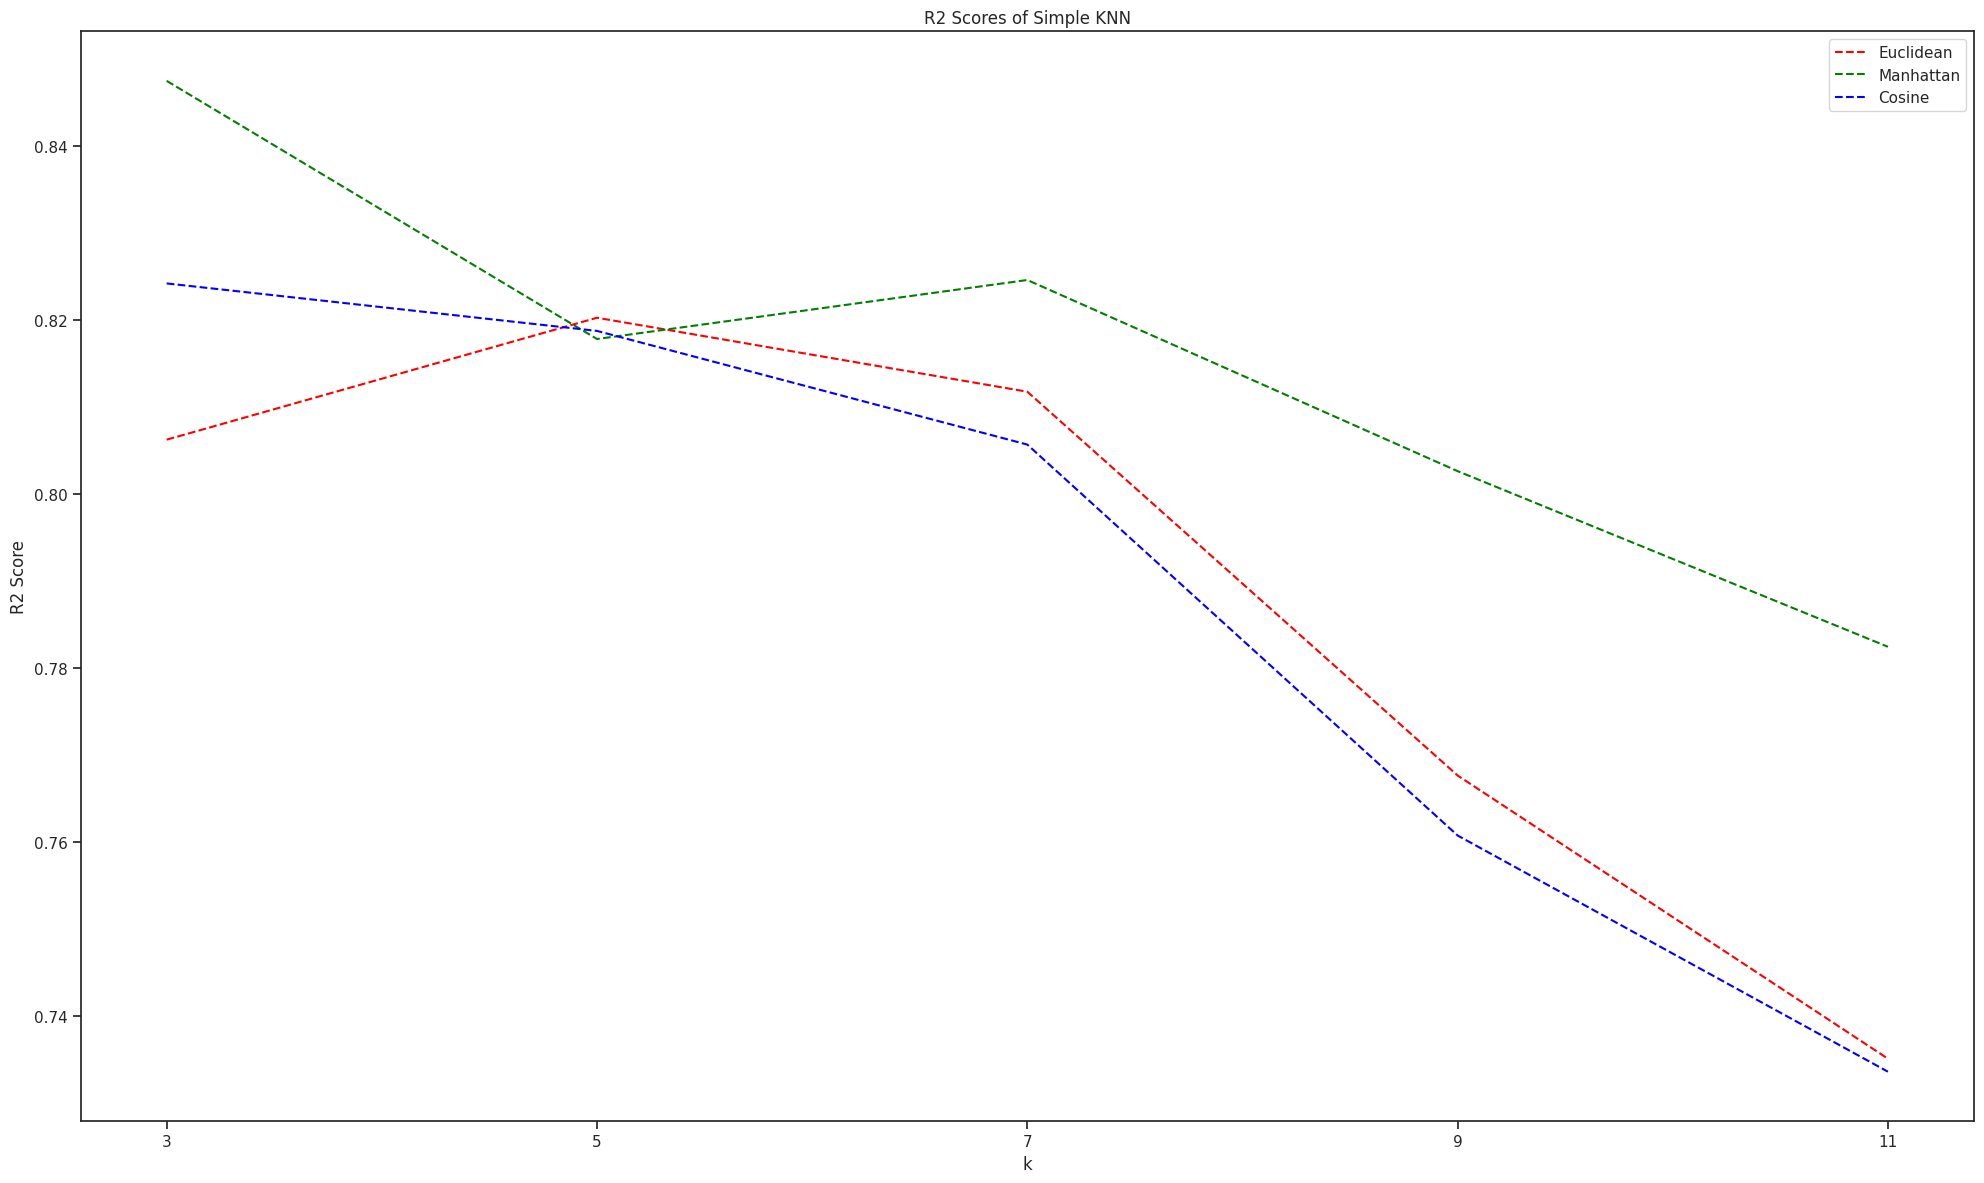

In [170]:
distance_metrics=["Euclidean","Manhattan","Cosine"]
colors=["red","green","blue"]

plt.figure(figsize=(20,12))

for i in range(3):
  a1=[]
  for j in range(5):
    a1.append(res_custom_simple[j][i])

  plt.plot(k_values,a1,label=distance_metrics[i],color=colors[i],linestyle='--')


plt.title("R2 Scores of Simple KNN")
plt.xlabel("k")
plt.ylabel("R2 Score")
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.show()



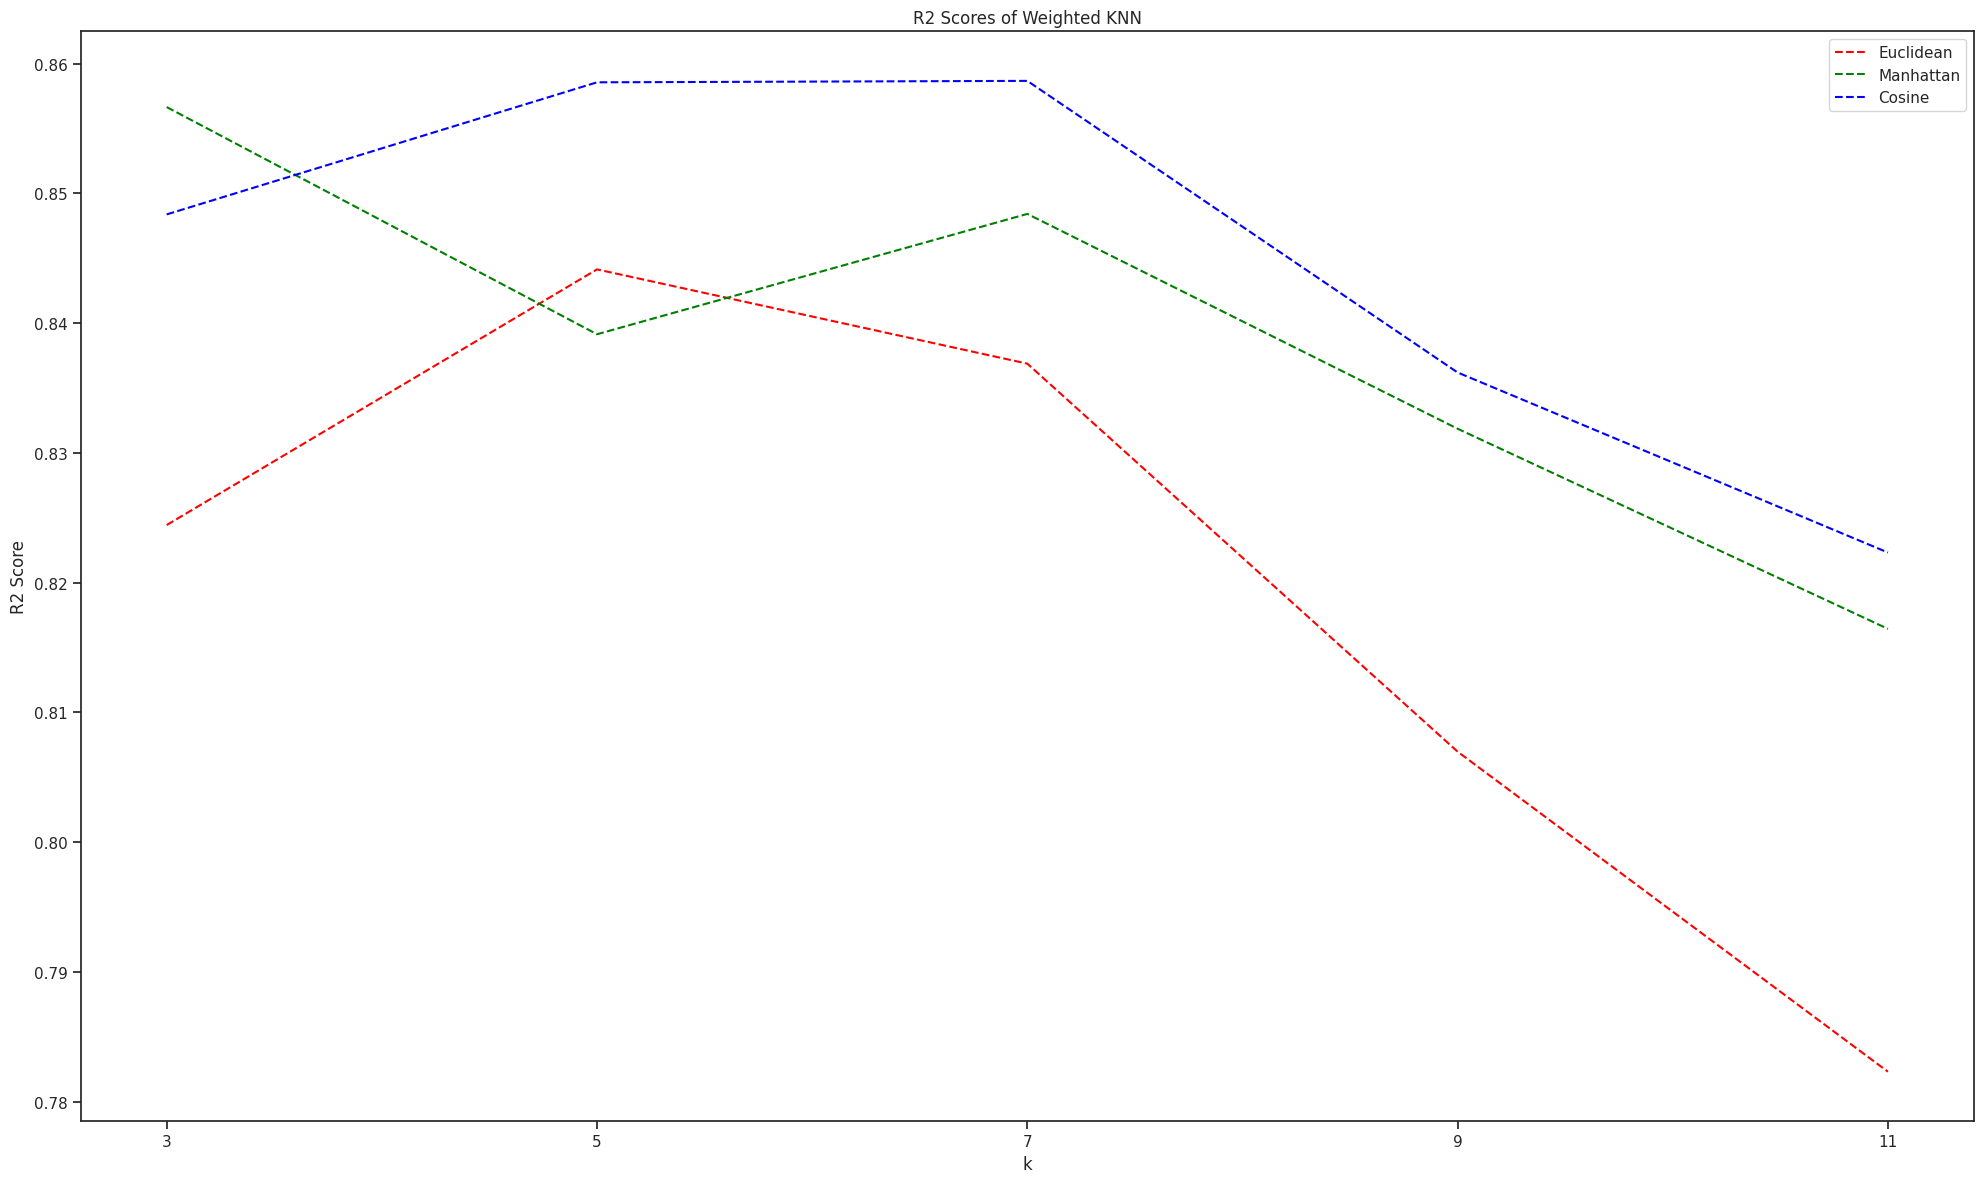

In [171]:
distance_metrics=["Euclidean","Manhattan","Cosine"]
colors=["red","green","blue"]

plt.figure(figsize=(20,12))

for i in range(3):
  a2=[]
  for j in range(5):
    a2.append(res_custom_weighted[j][i])

  plt.plot(k_values,a2,label=distance_metrics[i],color=colors[i],linestyle='--')


plt.title("R2 Scores of Weighted KNN")
plt.xlabel("k")
plt.ylabel("R2 Score")
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.show()



### 7.2 Plot corresponding R² scores from scikit-learn for the same parameters

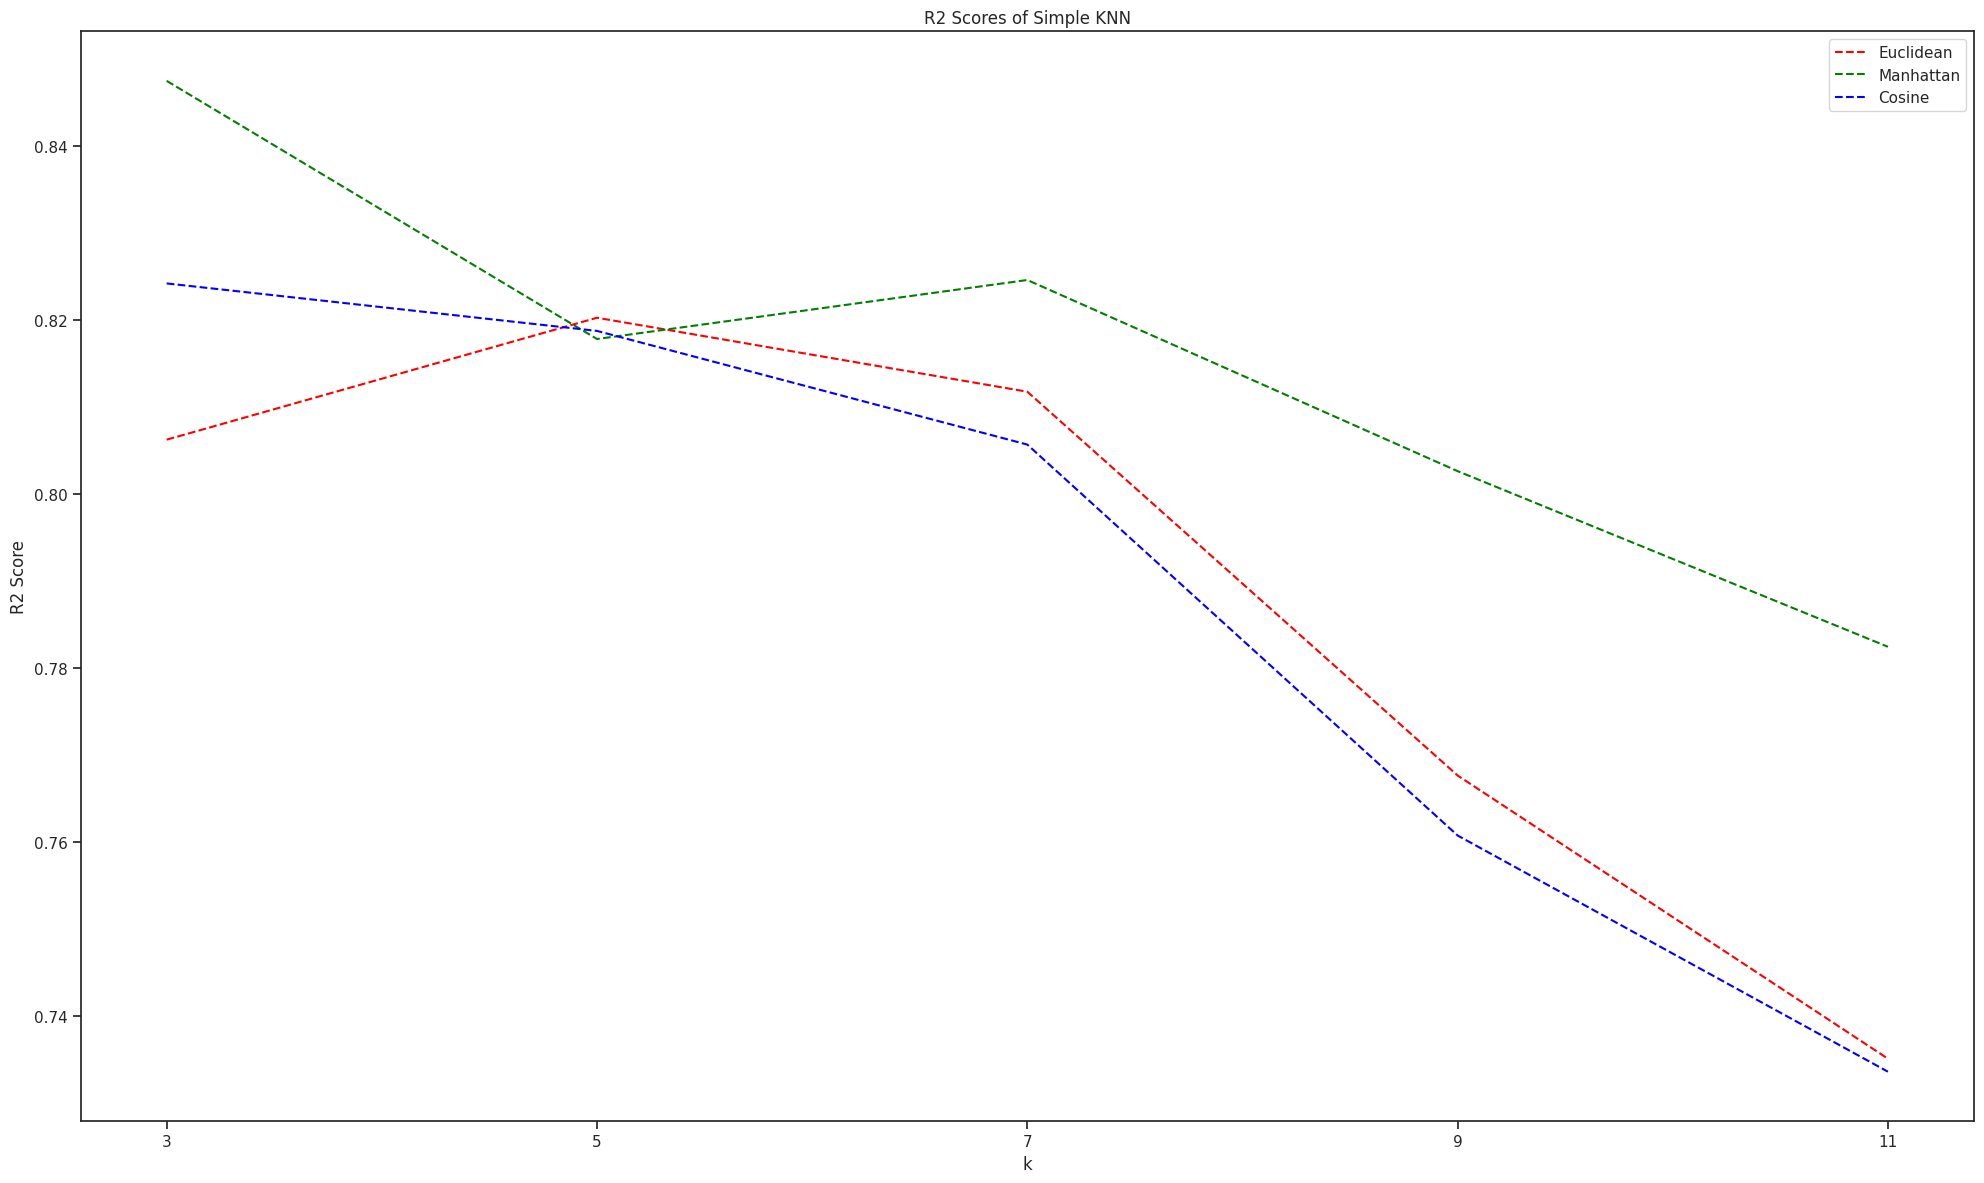

In [172]:
distance_metrics=["Euclidean","Manhattan","Cosine"]
colors=["red","green","blue"]

plt.figure(figsize=(20,12))

for i in range(3):
  a1=[]
  for j in range(5):
    a1.append(res_library_simple[j][i])

  plt.plot(k_values,a1,label=distance_metrics[i],color=colors[i],linestyle='--')


plt.title("R2 Scores of Simple KNN")
plt.xlabel("k")
plt.ylabel("R2 Score")
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.show()



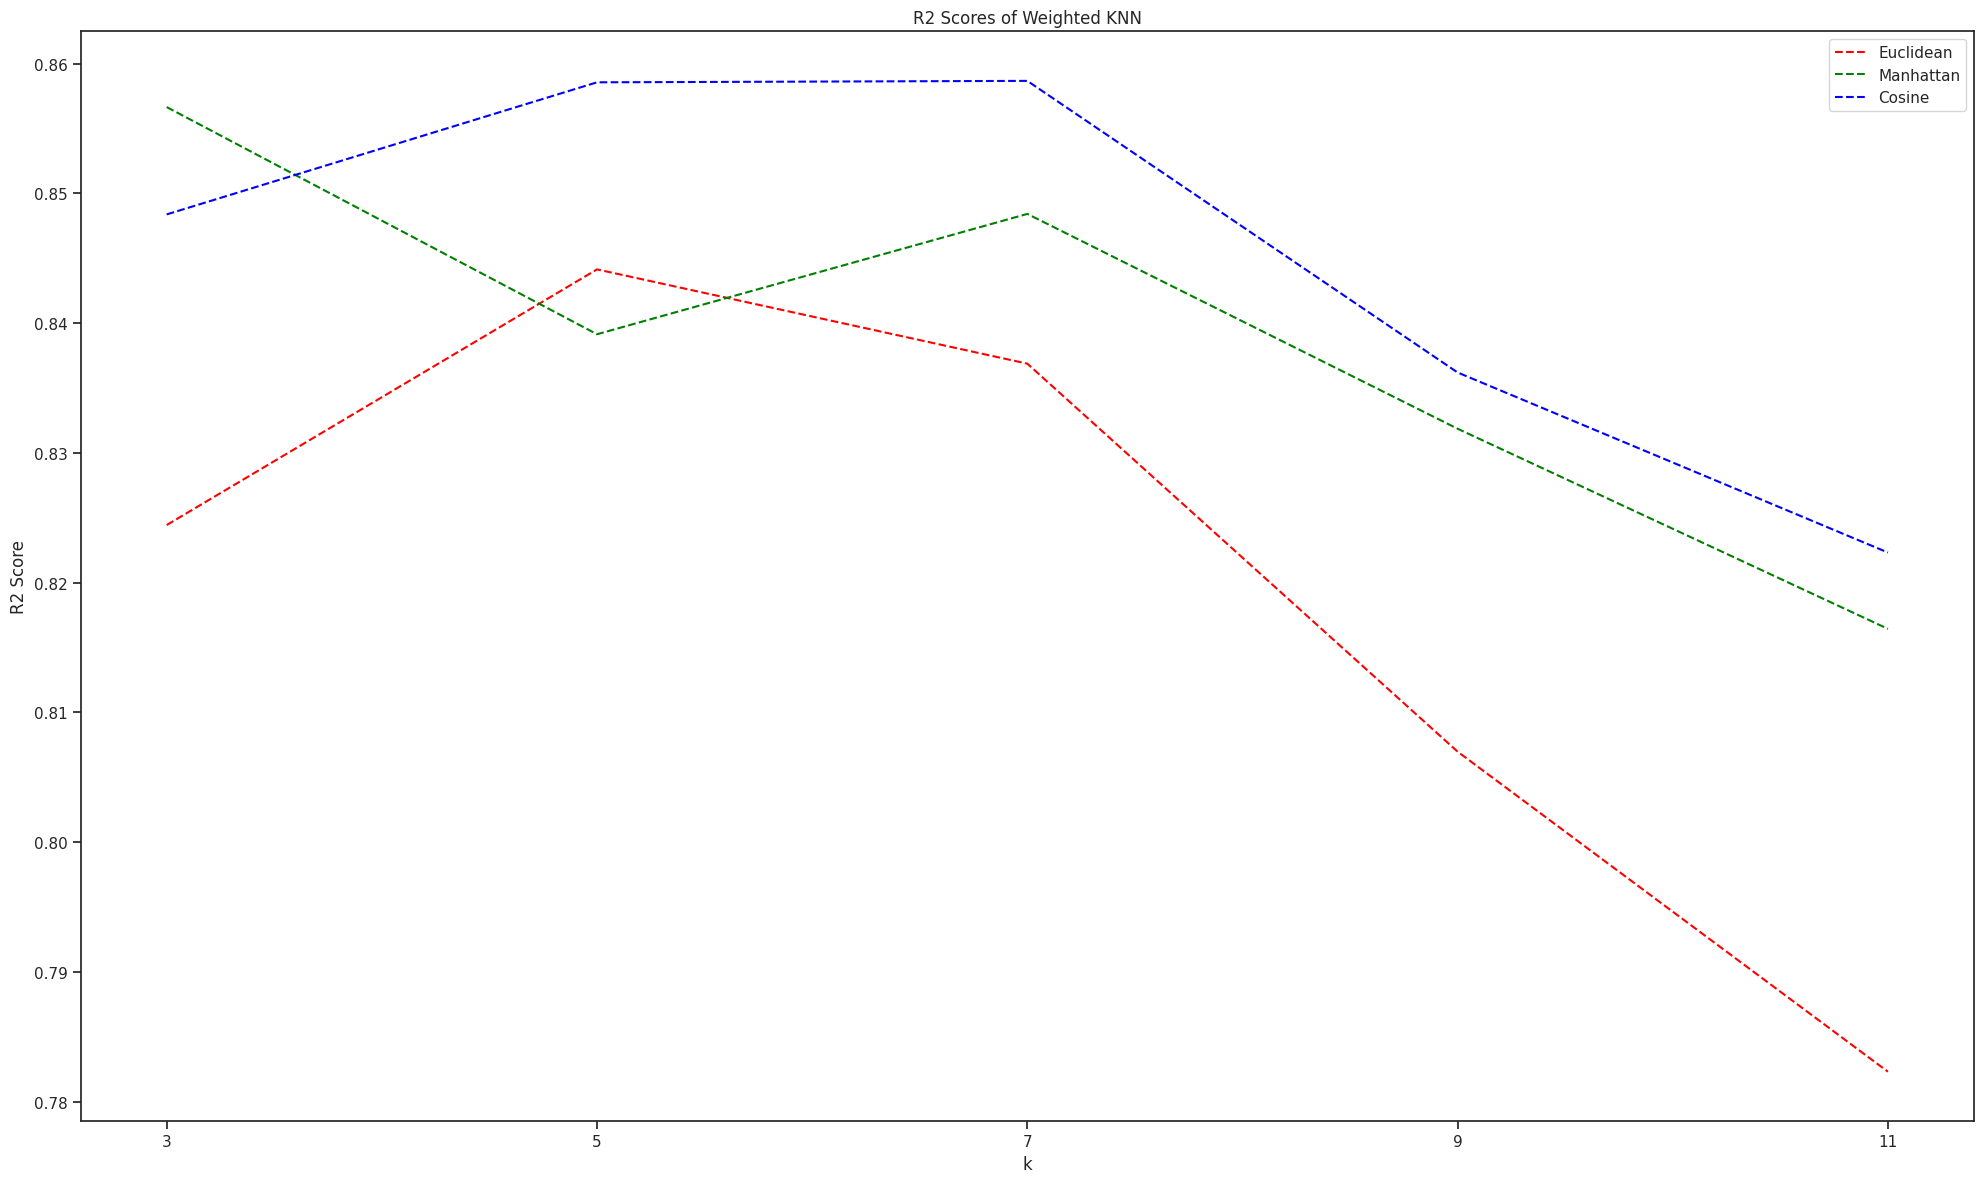

In [173]:
distance_metrics=["Euclidean","Manhattan","Cosine"]
colors=["red","green","blue"]

plt.figure(figsize=(20,12))

for i in range(3):
  a2=[]
  for j in range(5):
    a2.append(res_library_weighted[j][i])

  plt.plot(k_values,a2,label=distance_metrics[i],color=colors[i],linestyle='--')


plt.title("R2 Scores of Weighted KNN")
plt.xlabel("k")
plt.ylabel("R2 Score")
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.show()



### 7.3 Comparing the R² scores of scikit-learn weighted KNN with the custom weighted KNN for the best combination.

In [175]:
#The best configuration
r2_custom = res_custom_weighted[2][2]

r2_library = res_library_weighted[2][2]

if(r2_library>r2_custom):
  print("The R2 score of the scikit-learn model is greater than the custom implementation by: ",r21-r2)
elif(r2_custom>r2_library):
  print("The R2 score of the custom implementation is greater than the scikit-learn model by: ",r2-r21)
else:
  print("The R2 scores of both models are equal")

The R2 score of the scikit-learn model is greater than the custom implementation by:  0.09445443885826921


### 7.4 Plotting the Scatter Plots of the actual and predicted datapoints

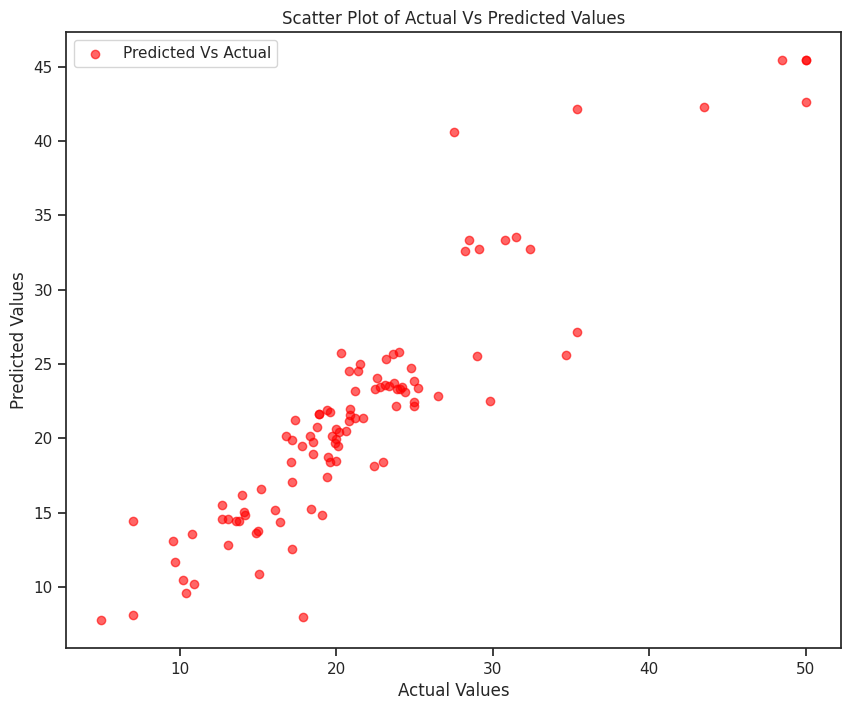

In [184]:
#Plot for the best configuration in simple knn
knn = KNN(k=3, distance_metric="manhattan")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color="red",alpha=0.6,label="Predicted Vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual Vs Predicted Values")
plt.legend()
plt.show()

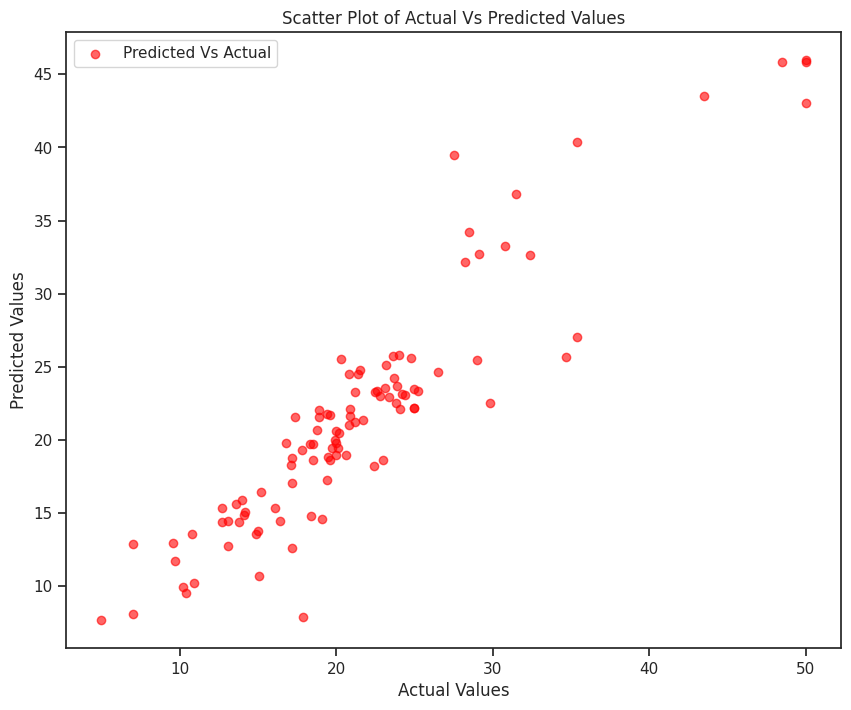

In [185]:
#Plot for the best configuration in weighted knn
knn = Weighted_KNN(k=3, distance_metric="manhattan")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color="red",alpha=0.6,label="Predicted Vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual Vs Predicted Values")
plt.legend()
plt.show()

## 8. Summarizing the findings

*   Which (k, distance metric) performed best?

1.   For Simple KNN the combination of k=3 and manhattan distance metric performed the best.
2.   For Weighted KNN the combination of k=7 and cosine distance metric performed the best.

*   How does your implementation compare with scikit-learn?

My implementation of KNN for both simple and weighted gives nearly the same R2 score for all the pairs of k and distance metric.

*   Discuss any observations regarding distance metrics or weighting.

1. Simple KNN
*   Manhattan distance yields the best result as compared to the other distance metrics.
*   As the value of the k becomes large(like 9,11) the R2 score for each distance metric decreases.

2. Weighted KNN
*   In Weighted KNN cosine distance metric outperfroms other distance metrics for nearly all values of k.
*  Large values of k yield lower R2 score for Weighted KNN also.
*   The R2 scores calculated for this is higher than Simple KNN, which shows that weighing the values of y with the inverse of distance gives better performance than given by simply taking the average.
*   If distance of any test data point is zero then a very large value of `1e9` has been taken as the weight.

